## Import library

In [1]:
import numpy as np
import pandas as pd
import datetime
import random

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [4]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


In [5]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

In [7]:
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

## Read dataset into dataframe

In [28]:
df_train = pd.read_csv('./dataset/train.csv')
df_test  = pd.read_csv('./dataset/test_9K3DBWQ.csv')
df_train.shape, df_test.shape

((32820, 44), (14067, 43))

In [9]:
df_train.columns

Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [10]:
df_train.sample(10)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
12586,42584,current,M,32,245,12672.06,NaN,20713.12,4727.0,3848.00,146.0,NaN,17.0,11.0,NaN,16.0,9.0,39000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19022.00,10012.0,22.0,2.0,5000.0,25898.00,15941.0,3.0,29.0,9500.0,14734.50,41770.83,4.0,16.0,40000.0,NaN,2077.00,5500
17881,40214,current,M,31,823,6012.00,9602.97,2023.00,1783.0,8497.00,1801.0,3.0,1.0,2.0,8.0,2.0,4.0,19000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56029.97,50094.0,23.0,5.0,22828.0,17895.00,22948.0,1.0,6.0,22820.0,27036.75,29695.00,5.0,11.0,22828.0,NaN,544.41,3511
30104,3266,current,M,31,283,22853.74,632.00,5288.00,NaN,2314.00,NaN,15.0,14.0,16.0,1.0,NaN,NaN,170000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276883.61,80085.0,15.0,5.0,54000.0,41979.68,45011.0,1.0,5.0,45000.0,65520.88,112552.00,7.0,11.0,55000.0,NaN,2410.62,1802
21415,2145,current,F,35,233,16461.24,NaN,121104.70,NaN,1692.00,NaN,16.0,28.0,18.0,NaN,NaN,NaN,160000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.00,NaN,1.0,0.0,NaN,149348.54,204052.0,2.0,7.0,160000.0,130867.42,92509.00,4.0,6.0,40000.0,NaN,18261.92,659
657,1662,current,M,31,523,10645.57,NaN,8732.99,NaN,1193.46,NaN,12.0,9.0,8.0,NaN,NaN,NaN,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17658.29,17318.0,7.0,2.0,15300.0,10505.11,10755.0,3.0,4.0,7500.0,13594.75,24294.00,3.0,4.0,14000.0,NaN,3.46,2744
12562,15655,current,M,37,523,53834.76,2122.00,6048.15,NaN,2495.83,NaN,13.0,13.0,12.0,8.0,NaN,NaN,78000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25013.50,74129.5,24.0,10.0,29000.0,80447.45,21253.0,3.0,10.0,15000.0,31227.00,40883.00,8.0,8.0,15100.0,NaN,0.00,24759
4361,11081,current,M,44,534,4238.90,NaN,3653.45,2242.0,1398.00,NaN,3.0,NaN,10.0,NaN,1.0,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25705.66,25577.0,7.0,1.0,25466.0,35545.00,37832.0,2.0,8.0,24266.0,26805.65,24760.59,3.0,6.0,24466.0,NaN,522.86,550
27051,14801,current,M,31,544,4939.25,NaN,12827.43,NaN,2076.92,NaN,7.0,12.0,17.0,NaN,NaN,NaN,195000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45834.71,38111.0,14.0,4.0,27270.0,58994.42,249034.0,9.0,14.0,155072.0,226221.31,52632.00,2.0,11.0,51750.0,NaN,3.60,2505
5929,36184,saving,M,31,836,71343.10,11384.00,26428.00,4346.5,528.00,NaN,13.0,7.0,8.0,9.0,3.0,8.0,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36919.34,9896.0,30.0,5.0,7719.0,108532.95,68716.0,7.0,20.0,28000.0,135938.41,92380.00,19.0,25.0,36000.0,NaN,0.00,8381
18735,7143,current,M,31,324,27941.06,NaN,5762.89,NaN,3049.00,NaN,11.0,13.0,27.0,NaN,NaN,NaN,130000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1873


In [11]:
df_train.dtypes

id                         int64
account_type              object
gender                    object
age                        int64
region_code                int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may             float64
cc_count_jun             float64
dc_count_apr             float64
dc_count_may             float64
dc_count_jun             float64
card_lim                 float64
personal_loan_active     float64
vehicle_loan_active      float64
personal_loan_closed     float64
vehicle_loan_closed      float64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr         float64
max_credit

In [12]:
df_test.sample(5)

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
9671,20814,saving,F,30,483,3095.00,216.0,2293.00,298.00,2903.00,NaN,9.0,4.0,4.0,1.0,2.0,NaN,59000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,627.85,NaN,3.0,0.0,NaN,50520.33,71889.00,7.0,16.0,30000.0,31775.63,31210.00,4.0,16.0,19000.0,NaN,0.00
7015,27695,current,M,44,723,4760.48,NaN,1751.04,NaN,3842.26,NaN,6.0,4.0,5.0,NaN,NaN,1.0,277000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36502.49,76153.41,9.0,3.0,50739.0,54015.49,24131.36,3.0,6.0,20000.0,49907.49,56305.29,4.0,10.0,28042.0,NaN,1119.77
13256,28200,current,M,32,726,23895.42,12048.5,50324.86,3643.40,4808.00,2438.0,43.0,52.0,22.0,11.0,4.0,5.0,74000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,72163.12,68813.02,22.0,5.0,37572.0,46874.21,37272.00,1.0,17.0,36982.0,41130.69,39321.00,3.0,13.0,36983.0,NaN,7140.85
13623,13942,current,M,34,723,24666.00,NaN,61324.00,18197.00,1490.00,NaN,4.0,9.0,6.0,NaN,2.0,1.0,39000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25222.25,25352.00,4.0,4.0,18600.0,120700.88,120739.00,8.0,12.0,24500.0,55028.17,55175.00,10.0,15.0,18400.0,NaN,0.00
2013,15077,current,M,34,755,10631.24,1233.0,5010.21,1549.14,40758.00,339.0,13.0,7.0,12.0,1.0,1.0,2.0,52000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92537.75,134481.00,24.0,8.0,105169.0,64598.42,23002.40,5.0,12.0,16892.0,31970.29,62890.00,8.0,12.0,38220.0,NaN,0.00


In [13]:
df_dict = pd.read_excel('./dataset/Data_Dictionary.xlsx')
df_dict


,Variable,Description
0,id,Unique ID for every Customer
1,account_type,Account Type – current or saving
2,gender,Gender of customer
3,age,Age of customer
4,region_code,Code assigned to region of residence (has order)
5,cc_cons_apr,Credit card spend in April
6,dc_cons_apr,Debit card spend in April
7,cc_cons_may,Credit card spend in May
8,dc_cons_may,Debit card spend in May
9,cc_cons_jun,Credit card spend in June


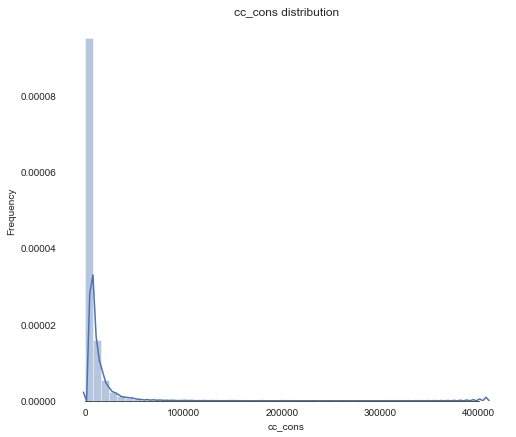

In [14]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution
sns.distplot(df_train['cc_cons'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="cc_cons")
ax.set(title="cc_cons distribution")
sns.despine(trim=True, left=True)
plt.show()

In [15]:
print("Skewness: %f" % df_train['cc_cons'].skew())
print("Kurtosis: %f" % df_train['cc_cons'].kurt())

Skewness: 7.518036
Kurtosis: 109.136639


In [16]:
# id , account_type , gender,age , region_code , loan_enq
df_train.columns

Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

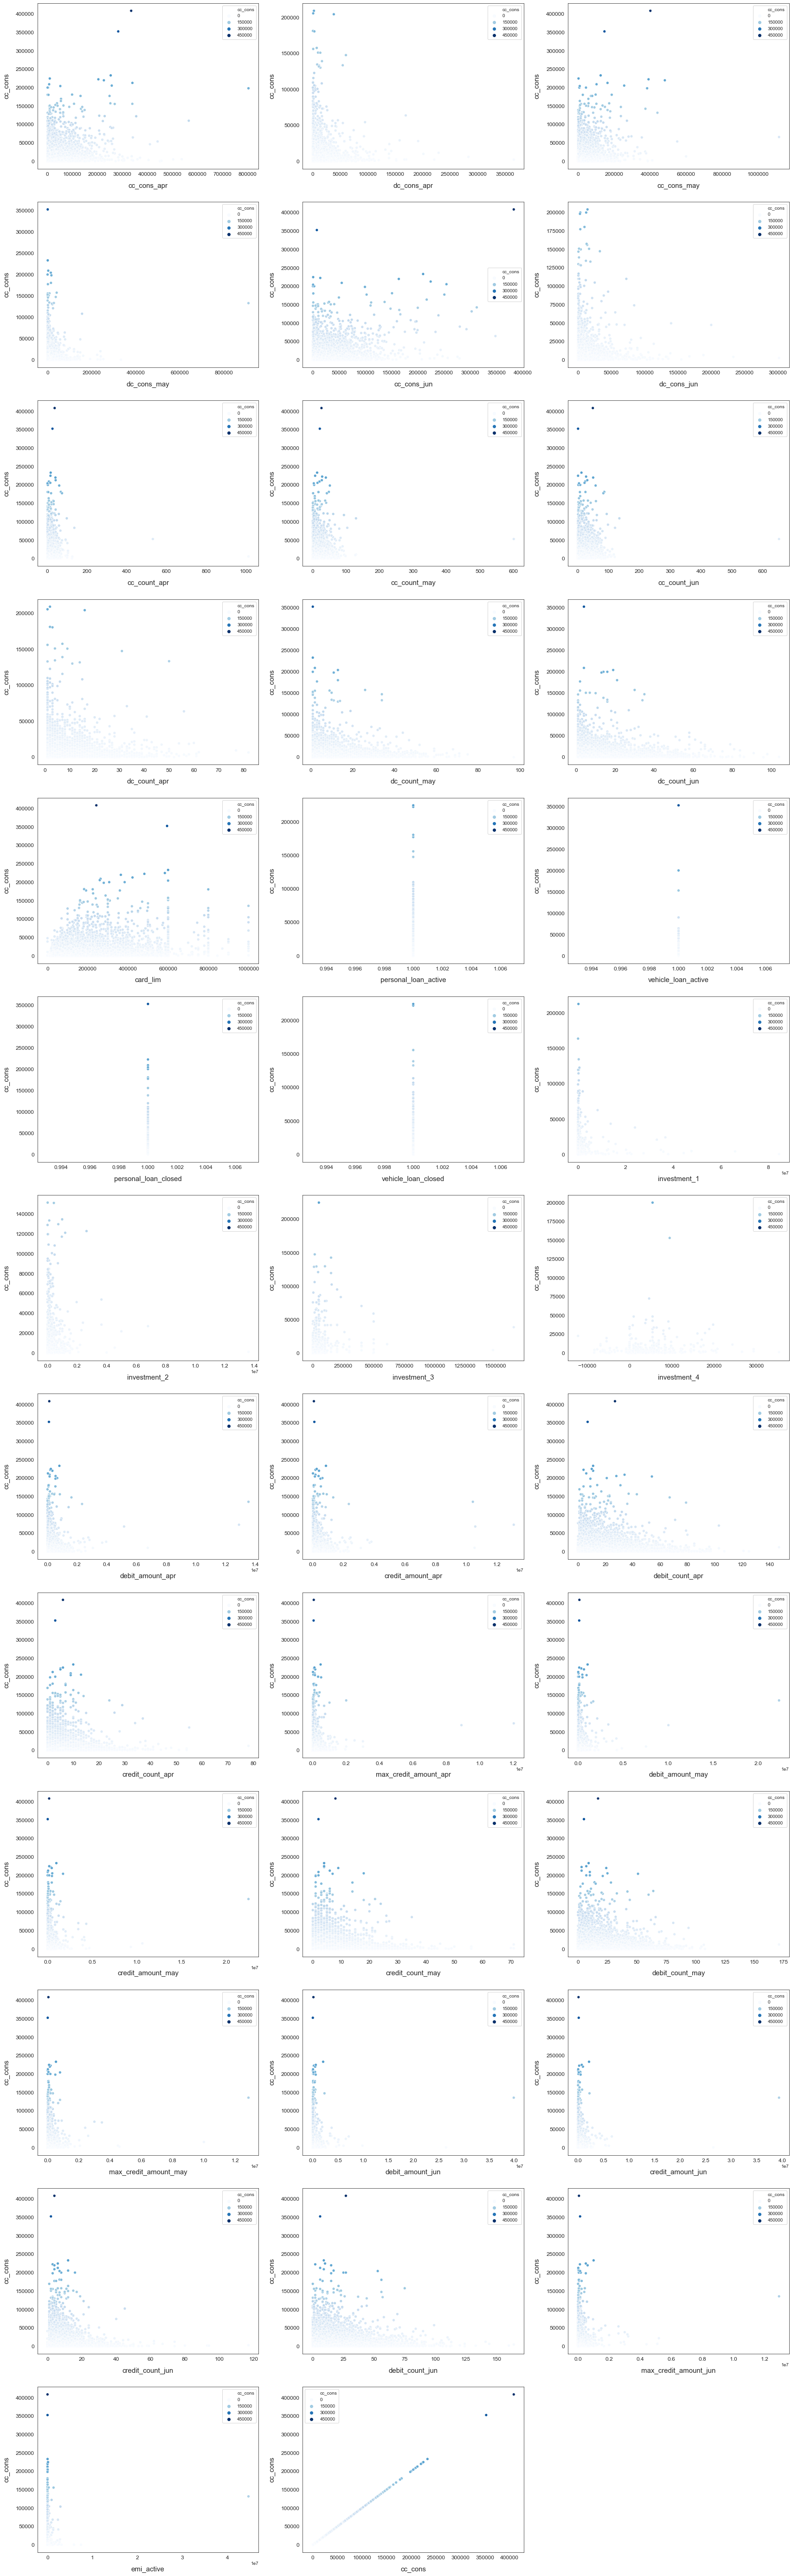

In [17]:
numeric_dtypes = ['int64', 'float64']
numeric = []
for i in df_train.columns:
    if df_train[i].dtype in numeric_dtypes:
        if i in ['id', 'account_type','gender','age','region_code','loan_enq']:
            pass
        else:
            numeric.append(i)
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(df_train[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='cc_cons', hue='cc_cons', palette='Blues', data=df_train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('cc_cons', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

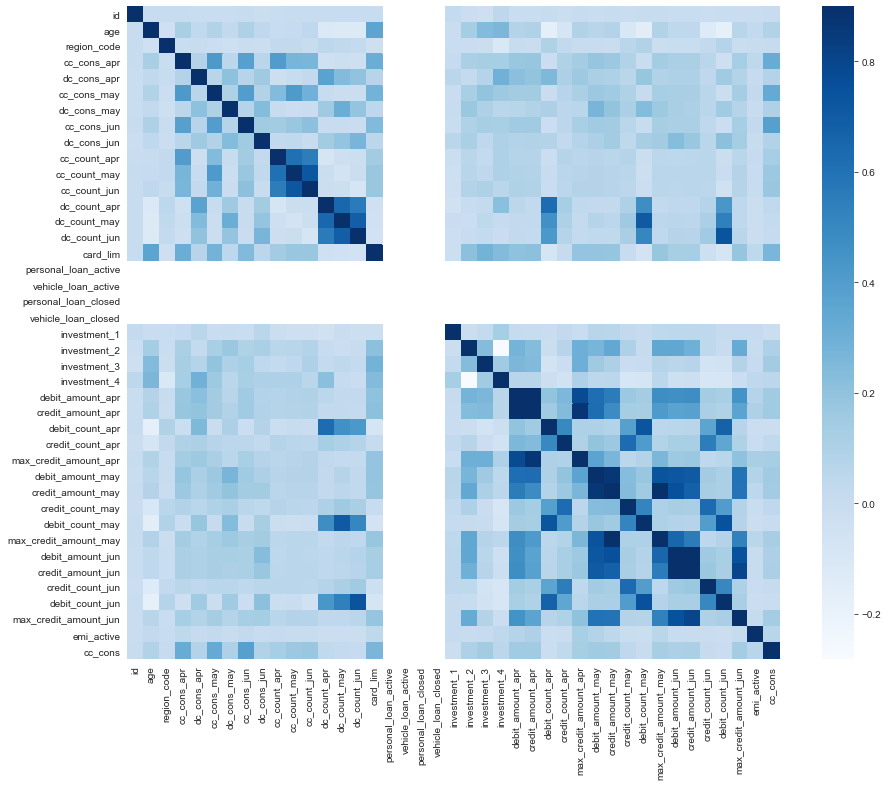

In [18]:
corr = df_train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [19]:
df_train.columns

Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

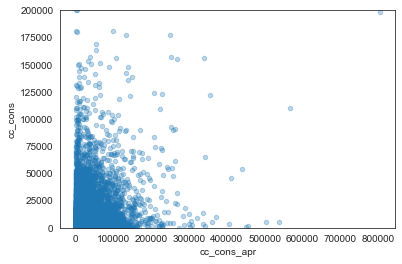

In [20]:
data = pd.concat([df_train['cc_cons'], df_train['cc_cons_apr']], axis=1)
data.plot.scatter(x='cc_cons_apr', y='cc_cons', alpha=0.3, ylim=(0,200000));

In [29]:
# Remove the Ids from train and test, as they are unique for each row and hence not useful for the model
train_ID = df_train['id']
test_ID = df_test['id']
df_train.drop('id', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)
df_train.shape, df_test.shape

((32820, 43), (14067, 42))

## Feature Engineer

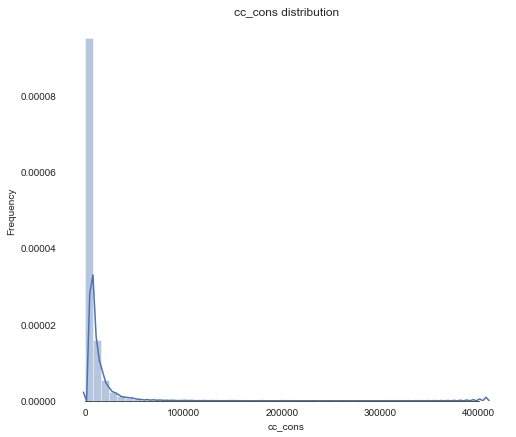

In [22]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df_train['cc_cons'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="cc_cons")
ax.set(title="cc_cons distribution")
sns.despine(trim=True, left=True)
plt.show()

In [31]:
# Remove outlier
df_train.drop(df_train[(df_train['cc_cons']>250000)].index, inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [30]:
df_train["cc_cons"] = np.log1p(df_train["cc_cons"])


 mu = 8.02 and sigma = 1.31



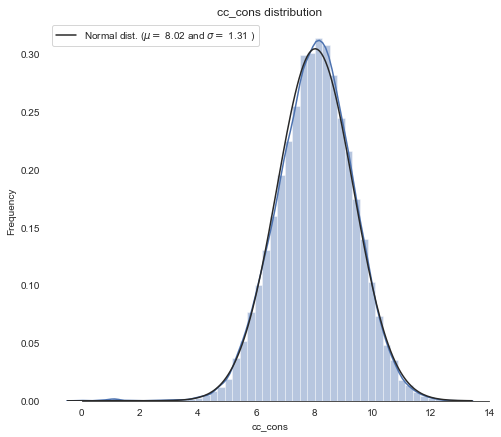

In [24]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df_train['cc_cons'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['cc_cons'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="cc_cons")
ax.set(title="cc_cons distribution")
sns.despine(trim=True, left=True)

plt.show()

In [32]:
# Split features and labels
train_labels = df_train['cc_cons'].reset_index(drop=True)
train_features = df_train.drop(['cc_cons'], axis=1)
test_features = df_test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(46887, 42)

In [122]:
all_features.to_csv('./dataset/all_before_fillmissing.csv', index=False)

In [ ]:
train_labels.to_csv('./dataset/train_labels.csv', index=False)

## Fill missing values

In [60]:
all_features=pd.read_csv('./dataset/all_before_fillmissing.csv')

In [61]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(all_features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:42]

Percent of missing data


[('investment_4', 98.77),
 ('loan_enq', 98.18),
 ('vehicle_loan_active', 97.44),
 ('investment_3', 95.85),
 ('investment_1', 95.57),
 ('vehicle_loan_closed', 95.08),
 ('investment_2', 92.82),
 ('personal_loan_active', 91.73),
 ('personal_loan_closed', 91.17),
 ('dc_cons_jun', 64.75),
 ('dc_cons_apr', 58.19),
 ('dc_count_apr', 58.19),
 ('dc_cons_may', 52.71),
 ('dc_count_may', 52.71),
 ('dc_count_jun', 47.03),
 ('credit_amount_may', 10.45),
 ('max_credit_amount_may', 10.45),
 ('credit_amount_apr', 10.17),
 ('max_credit_amount_apr', 10.17),
 ('cc_count_apr', 7.33),
 ('debit_amount_may', 7.04),
 ('debit_amount_jun', 6.7),
 ('credit_count_may', 6.33),
 ('debit_count_may', 6.33),
 ('debit_amount_apr', 5.84),
 ('debit_count_apr', 5.43),
 ('credit_count_apr', 5.43),
 ('cc_count_jun', 4.74),
 ('credit_amount_jun', 4.7),
 ('max_credit_amount_jun', 4.7),
 ('credit_count_jun', 4.66),
 ('debit_count_jun', 4.66),
 ('cc_count_may', 3.62),
 ('card_lim', 0.03),
 ('account_type', 0.0),
 ('gender', 0.0)

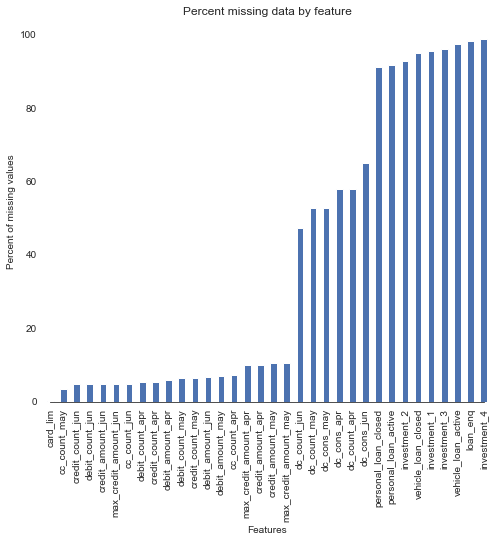

In [62]:
# Visualize missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(df_train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [63]:
all_features.columns

Index(['account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

In [64]:
# fill 0 in 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
#        'vehicle_loan_closed',

for i in all_features.columns:
    if i in [ 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed']:
        all_features[i].fillna(0, inplace=True)
            

In [65]:
# loan_enq fill 0, and change Y to 1
all_features['loan_enq'].replace('Y',1, inplace=True)
all_features['loan_enq'].fillna(0,inplace=True)

In [66]:
all_features['card_lim'][all_features['card_lim']<10000]=np.nan
all_features['card_lim'] = all_features.groupby('age')['card_lim'].transform(lambda x: x.fillna(x.median()))



In [67]:
# fill nan 'investment_1', 'investment_2', 'investment_3', 'investment_4' to 0
for i in all_features.columns:
    if i in [ 'investment_1', 'investment_2', 'investment_3', 'investment_4']:
        all_features[i].fillna(0, inplace=True)
        
all_features['total_investment']=all_features['investment_1']+all_features['investment_2']+all_features['investment_3']+all_features['investment_4']
all_features.drop(['investment_1','investment_2','investment_3','investment_4'], axis=1, inplace=True)

In [68]:
# 'dc_cons_apr', 'dc_count_apr
# 'dc_cons_may', 'dc_count_may'
all_features['dc_cons_apr'].fillna(0, inplace=True)
all_features['dc_count_apr'].fillna(0, inplace=True) 
all_features['dc_cons_may'].fillna(0, inplace=True)
all_features['dc_count_may'].fillna(0, inplace=True) 

In [69]:
all_features.update(all_features[['dc_cons_jun', 'dc_count_jun']][(all_features['dc_cons_jun'].isnull()) & (all_features['dc_count_jun'].isnull())].fillna(0))


In [70]:
# ('dc_cons_jun', 17.73),
all_features['dc_cons_jun'] = all_features.groupby('age')['dc_cons_jun'].transform(lambda x: x.fillna(x.median()))


In [71]:
#  ('debit_amount_may', 7.04),
#  ('debit_count_may', 6.33),

#  ('debit_amount_jun', 6.7),
#   ('debit_count_jun', 4.66),
   
#  ('debit_amount_apr', 5.84),
#  ('debit_count_apr', 5.43),
all_features.update(all_features[['debit_amount_may', 'debit_count_may']][(all_features['debit_amount_may'].isnull()) & (all_features['debit_count_may'].isnull())].fillna(0))
all_features.update(all_features[['debit_amount_jun', 'debit_count_jun']][(all_features['debit_amount_jun'].isnull()) & (all_features['debit_count_jun'].isnull())].fillna(0))
all_features.update(all_features[['debit_amount_apr', 'debit_count_apr']][(all_features['debit_amount_apr'].isnull()) & (all_features['debit_count_apr'].isnull())].fillna(0))


In [72]:
#  ('debit_amount_jun', 2.04),
#  ('debit_amount_may', 0.71),
#  ('debit_amount_apr', 0.41),

all_features['debit_amount_jun'] = all_features.groupby('age')['debit_amount_jun'].transform(lambda x: x.fillna(x.median()))
all_features['debit_amount_may'] = all_features.groupby('age')['debit_amount_may'].transform(lambda x: x.fillna(x.median()))
all_features['debit_amount_apr'] = all_features.groupby('age')['debit_amount_apr'].transform(lambda x: x.fillna(x.median()))


In [73]:
#  ('credit_amount_jun', 4.7),
#  ('max_credit_amount_jun', 4.7),
# ('credit_amount_may', 10.45),
#  ('max_credit_amount_may', 10.45),
#  ('credit_amount_apr', 10.17),
#  ('max_credit_amount_apr', 10.17),

all_features['credit_amount_may'].fillna(0, inplace=True)
all_features['max_credit_amount_may'].fillna(0, inplace=True) 
all_features['credit_amount_apr'].fillna(0, inplace=True)
all_features['max_credit_amount_apr'].fillna(0, inplace=True)
all_features['credit_amount_jun'].fillna(0, inplace=True)
all_features['max_credit_amount_jun'].fillna(0, inplace=True)


In [74]:
    
# ('cc_count_may', 3.62),
# ('cc_count_apr', 7.33),
# ('cc_count_jun', 4.74),

for col in ['cc_count_may','cc_count_apr','cc_count_jun']:
    all_features[col] = all_features.groupby(['age','card_lim'])[col].transform(lambda x: x.fillna(x.median()))


In [77]:
# ('cc_count_apr', 0.38),
# ('cc_count_jun', 0.22),
# ('cc_count_may', 0.21),

for col in ['cc_count_may','cc_count_apr','cc_count_jun']:
    all_features[col] = all_features.groupby(['age'])[col].transform(lambda x: x.fillna(x.median()))


In [75]:
# ('credit_count_may', 6.33),
# ('credit_count_apr', 5.43),
# ('credit_count_jun', 4.66),

for col in ['credit_count_may','credit_count_apr', 'credit_count_jun']:
    all_features[col] = all_features.groupby(['age'])[col].transform(lambda x: x.fillna(x.median()))


In [78]:
missing = percent_missing(all_features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:42]

Percent of missing data


[('account_type', 0.0),
 ('gender', 0.0),
 ('age', 0.0),
 ('region_code', 0.0),
 ('cc_cons_apr', 0.0),
 ('dc_cons_apr', 0.0),
 ('cc_cons_may', 0.0),
 ('dc_cons_may', 0.0),
 ('cc_cons_jun', 0.0),
 ('dc_cons_jun', 0.0),
 ('cc_count_apr', 0.0),
 ('cc_count_may', 0.0),
 ('cc_count_jun', 0.0),
 ('dc_count_apr', 0.0),
 ('dc_count_may', 0.0),
 ('dc_count_jun', 0.0),
 ('card_lim', 0.0),
 ('personal_loan_active', 0.0),
 ('vehicle_loan_active', 0.0),
 ('personal_loan_closed', 0.0),
 ('vehicle_loan_closed', 0.0),
 ('debit_amount_apr', 0.0),
 ('credit_amount_apr', 0.0),
 ('debit_count_apr', 0.0),
 ('credit_count_apr', 0.0),
 ('max_credit_amount_apr', 0.0),
 ('debit_amount_may', 0.0),
 ('credit_amount_may', 0.0),
 ('credit_count_may', 0.0),
 ('debit_count_may', 0.0),
 ('max_credit_amount_may', 0.0),
 ('debit_amount_jun', 0.0),
 ('credit_amount_jun', 0.0),
 ('credit_count_jun', 0.0),
 ('debit_count_jun', 0.0),
 ('max_credit_amount_jun', 0.0),
 ('loan_enq', 0.0),
 ('emi_active', 0.0),
 ('total_invest

In [79]:
all_features.to_csv('./dataset/all_feature.csv', index=False)

## Fix skewed features

In [80]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [81]:
all_features=pd.read_csv('./dataset/all_feature.csv')

In [82]:
# Some of the non-numeric predictors are stored as numbers; convert them into strings 

for col in ('region_code', 'age', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'loan_enq'):
    all_features[col] = all_features[col].apply(str)

In [83]:
# Fetch all numeric features
numeric_dtypes = ['int64', 'float64']

numeric = []
for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)

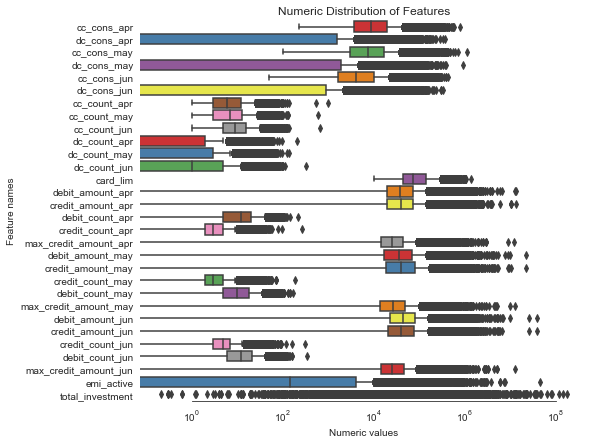

In [84]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=all_features[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [85]:
# Find skewed numerical features
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features >0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(28)

There are 27 numerical features with Skew > 0.5 :


emi_active               172.323584
credit_amount_jun        101.752099
total_investment          76.083868
debit_amount_may          63.182541
credit_amount_may         55.139825
max_credit_amount_may     53.550440
max_credit_amount_apr     53.360518
max_credit_amount_jun     51.893032
debit_amount_apr          36.979681
credit_amount_apr         35.420081
cc_count_apr              27.143169
dc_cons_may               25.787687
dc_cons_apr               12.694498
credit_count_apr          11.283525
credit_count_jun           9.217340
cc_cons_may                8.509183
cc_count_may               7.505595
cc_cons_jun                6.902187
cc_cons_apr                6.305964
cc_count_jun               5.779634
dc_count_apr               5.663588
dc_count_jun               4.773436
dc_count_may               4.152667
card_lim                   2.443711
debit_count_jun            2.010869
debit_count_may            1.819088
debit_count_apr            1.658557
dc_cons_jun                 

In [88]:
for i in skew_index:

    log_max = np.log(all_features[i].max())
    helpful_log_max_root = all_features[i]**(1/log_max)
    all_features[i] = normalize(helpful_log_max_root)

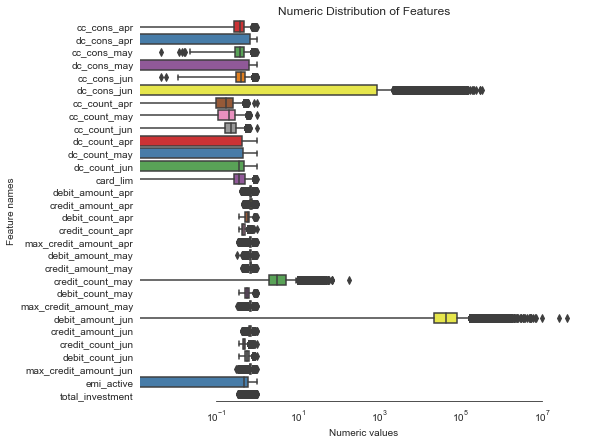

In [89]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=all_features[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [90]:
# Find skewed numerical features
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features >0.5]
skew_index = high_skew.index
print(skew_index)

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head()

Index(['card_lim', 'dc_count_apr'], dtype='object')
There are 2 numerical features with Skew > 0.5 :


card_lim        0.515444
dc_count_apr    0.515338
dc_cons_apr     0.389505
dc_count_may    0.354846
cc_cons_jun     0.267872
dtype: float64

In [91]:
all_features.describe()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,total_investment
count,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46886.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46886.000000,46887.000000,46887.000000,4.688600e+04,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46827.000000
mean,0.374891,0.283324,0.378458,0.306379,0.404982,1666.024609,0.179454,0.201733,0.231850,0.194671,0.231835,0.257290,0.397183,0.660760,0.635027,0.545142,0.430654,0.620192,0.642063,0.620159,4.031363,0.542727,0.617377,7.184677e+04,0.639693,0.481632,0.527934,0.646833,0.303857,0.093925
std,0.139065,0.337391,0.126600,0.326419,0.137822,6718.994063,0.101029,0.115563,0.116801,0.236540,0.254975,0.251225,0.165660,0.167262,0.218090,0.162299,0.111938,0.212731,0.172823,0.216652,3.863211,0.176945,0.215795,2.608092e+05,0.151868,0.058617,0.163861,0.155472,0.295980,0.229054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.274234,0.000000,0.287776,0.000000,0.303693,0.000000,0.100137,0.109014,0.164034,0.000000,0.000000,0.000000,0.270587,0.671217,0.673255,0.495665,0.416470,0.662782,0.653815,0.656830,2.000000,0.503093,0.658162,2.273225e+04,0.648756,0.445435,0.500114,0.661196,0.000000,0.000000
50%,0.374115,0.000000,0.377773,0.000000,0.399717,0.000000,0.172004,0.206849,0.234849,0.000000,0.000000,0.367879,0.369243,0.700112,0.701410,0.582937,0.447817,0.685128,0.683199,0.687981,3.000000,0.575699,0.685503,4.363893e+04,0.675018,0.486871,0.563198,0.683708,0.487758,0.000000
75%,0.471430,0.653671,0.465562,0.638120,0.498685,894.000000,0.251443,0.286979,0.310674,0.418894,0.459618,0.485553,0.501956,0.727004,0.728410,0.640795,0.490689,0.709497,0.710823,0.717084,5.000000,0.645421,0.711600,7.955487e+04,0.700554,0.516248,0.619890,0.708207,0.590439,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,339763.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,185.000000,1.000000,1.000000,3.986881e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
all_features["dc_cons_jun"] = np.log1p(all_features["dc_cons_jun"])
all_features["debit_amount_jun"] = np.log1p(all_features["debit_amount_jun"])
all_features["debit_amount_may"] = np.log1p(all_features["debit_amount_may"])

In [94]:
all_features.to_csv('./dataset/all_remove_skew.csv', index=False)

In [95]:
all_features.describe()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,total_investment
count,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46886.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46886.000000,46887.000000,46887.000000,46886.000000,46887.000000,46887.000000,46887.000000,46887.000000,46887.000000,46827.000000
mean,0.374891,0.283324,0.378458,0.306379,0.404982,3.005995,0.179454,0.201733,0.231850,0.194671,0.231835,0.257290,0.397183,0.660760,0.635027,0.545142,0.430654,0.620192,0.488632,0.620159,4.031363,0.542727,0.617377,10.174722,0.639693,0.481632,0.527934,0.646833,0.303857,0.093925
std,0.139065,0.337391,0.126600,0.326419,0.137822,3.714671,0.101029,0.115563,0.116801,0.236540,0.254975,0.251225,0.165660,0.167262,0.218090,0.162299,0.111938,0.212731,0.129822,0.216652,3.863211,0.176945,0.215795,2.492283,0.151868,0.058617,0.163861,0.155472,0.295980,0.229054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.274234,0.000000,0.287776,0.000000,0.303693,0.000000,0.100137,0.109014,0.164034,0.000000,0.000000,0.000000,0.270587,0.671217,0.673255,0.495665,0.416470,0.662782,0.503085,0.656830,2.000000,0.503093,0.658162,10.031584,0.648756,0.445435,0.500114,0.661196,0.000000,0.000000
50%,0.374115,0.000000,0.377773,0.000000,0.399717,0.000000,0.172004,0.206849,0.234849,0.000000,0.000000,0.367879,0.369243,0.700112,0.701410,0.582937,0.447817,0.685128,0.520696,0.687981,3.000000,0.575699,0.685503,10.683728,0.675018,0.486871,0.563198,0.683708,0.487758,0.000000
75%,0.471430,0.653671,0.465562,0.638120,0.498685,6.796824,0.251443,0.286979,0.310674,0.418894,0.459618,0.485553,0.501956,0.727004,0.728410,0.640795,0.490689,0.709497,0.536974,0.717084,5.000000,0.645421,0.711600,11.284215,0.700554,0.516248,0.619890,0.708207,0.590439,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.736007,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.693147,1.000000,185.000000,1.000000,1.000000,17.501105,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


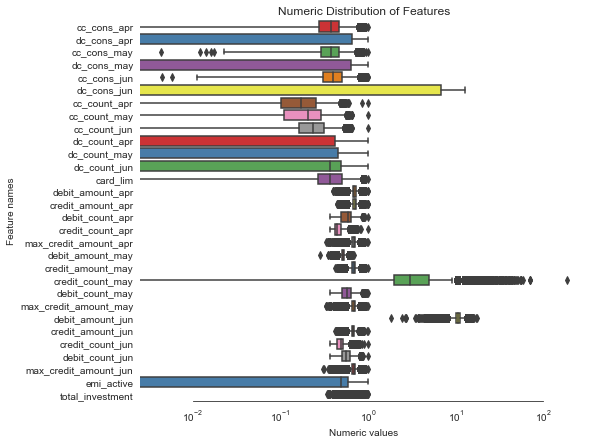

In [96]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=all_features[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

## Encode categorical features

In [97]:
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features.shape

(46887, 531)

In [98]:
all_features.sample(3)

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,total_investment,account_type_current,account_type_saving,gender_F,gender_M,age_118,age_119,age_120,age_121,age_123,age_124,age_218,age_219,age_22,age_220,age_221,age_222,age_223,age_224,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_48,age_49,age_50,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60,age_61,age_62,age_63,age_64,age_65,age_66,age_67,age_68,age_69,age_70,age_71,age_72,region_code_123,region_code_233,region_code_234,region_code_243,region_code_244,region_code_245,region_code_246,region_code_247,region_code_248,region_code_249,region_code_250,region_code_254,region_code_255,region_code_256,region_code_257,region_code_258,region_code_259,region_code_261,region_code_263,region_code_264,region_code_265,region_code_266,region_code_267,region_code_268,region_code_269,region_code_270,region_code_271,region_code_272,region_code_274,region_code_275,region_code_277,region_code_283,region_code_294,region_code_295,region_code_296,region_code_297,region_code_298,region_code_299,region_code_300,region_code_303,region_code_304,region_code_305,region_code_307,region_code_313,region_code_314,region_code_315,region_code_316,region_code_317,region_code_324,region_code_325,region_code_326,region_code_327,region_code_328,region_code_329,region_code_330,region_code_331,region_code_332,region_code_333,region_code_334,region_code_335,region_code_343,region_code_344,region_code_345,region_code_346,region_code_347,region_code_348,region_code_349,region_code_350,region_code_351,region_code_352,region_code_353,region_code_354,region_code_355,region_code_356,region_code_357,region_code_363,region_code_364,region_code_365,region_code_366,region_code_367,region_code_368,region_code_369,region_code_370,region_code_371,region_code_372,region_code_373,region_code_374,region_code_380,region_code_384,region_code_385,region_code_386,region_code_388,region_code_389,region_code_394,region_code_395,region_code_396,region_code_397,region_code_398,region_code_399,region_code_400,region_code_404,region_code_405,region_code_406,region_code_407,region_code_408,region_code_424,region_code_425,region_code_426,region_code_427,region_code_428,region_code_429,region_code_430,region_code_434,region_code_435,region_code_436,region_code_444,region_code_445,region_code_446,region_code_447,region_code_448,region_code_449,region_code_450,region_code_451,region_code_454,region_code_455,region_code_456,region_code_457,region_code_458,region_code_464,region_code_465,region_code_466,region_code_467,region_code_468,region_code_483,region_code_484,region_code_485,region_code_486,region_code_487,region_code_488,region_code_493,region_code_495,region_code_503,region_code_505,region_code_506,region_code_507,region_code_508,region_code_510,region_code_511,region_code_512,region_code_513,region_code_514,region_code_515,region_code_516,region_code_517,region_code_518,region_code_519,region_code_523,region_code_524,region_code_525,region_code_526,region_code_532,region_code_533,region_code_534,region_code_535,region_code_536,region_code_537,region_code_538,region_code_539,region_code_543,region_code_544,region_code_545,region_code_546,region_code_547,region_code_548,region_code_554,region_code_555,region_code_558,region_code_563,region_code_564,region_code_565,region_code_566,region_code_567,region_code_568,region_code_573,region_code_574,region_code_575,region_code_576,region_code_577,region_code_57

In [99]:
# Remove any duplicated column names
all_features = all_features.loc[:,~all_features.columns.duplicated()]

In [ ]:
all_features.to_csv('./dataset/all_features_final.csv', index=False)

## Recreate training and test sets

In [100]:
X = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((32820, 531), (32820,), (14067, 531))

In [101]:
np.any(np.isnan(X))

True

In [102]:
np.all(np.isfinite(X))

False

In [108]:
X[np.isnan(X)]=0

In [109]:
np.any(np.isnan(X))

False

In [215]:
X.to_csv('./dataset/X.csv', index=False)
X_test.to_csv('./dataset/X_test.csv', index=False)

In [216]:
df_labels=pd.DataFrame(train_labels)
df_labels.to_csv('./dataset/df_labels.csv', index=False)

# Train model

### Setup cross validation and define error metrics¶


In [103]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [104]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [110]:
# Define error metrics
def rmsle(y, y_pred):
    return mean_squared_log_error(y, y_pred)*100

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

### Set up model

In [106]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)


In [ ]:
scores = {}

In [116]:
score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm: 1.1683 (0.0158)


In [121]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

xgboost: 1.1700 (0.0169)


In [115]:
score = cv_rmse(svr)
# print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
# scores['svr'] = (score.mean(), score.std())

In [114]:
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 1.1763 (0.0159)


In [120]:
score = cv_rmse(ridge)
print("ridge: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['ridge'] = (score.mean(), score.std())

ridge: 1.1782 (0.0163)


In [118]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 1.1729 (0.0146)


In [119]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 1.1676 (0.0167)


In [123]:
### Fit the models
import pickle

In [124]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(train_labels))

# save the model to disk
filename = './models/stack_gen.sav'
pickle.dump(stack_gen_model, open(filename, 'wb'))

stack_gen


In [125]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, train_labels)

# save the model to disk
filename = './models/lightgbm.sav'
pickle.dump(lgb_model_full_data, open(filename, 'wb'))

lightgbm


In [126]:
print('xgboost')
xgb_model_full_data = xgboost.fit(X, train_labels)

# save the model to disk
filename = './models/xgboost.sav'
pickle.dump(xgb_model_full_data, open(filename, 'wb'))

xgboost


In [127]:
print('Svr')
svr_model_full_data = svr.fit(X, train_labels)

# save the model to disk
filename = './models/svr.sav'
pickle.dump(svr_model_full_data, open(filename, 'wb'))

Svr


In [128]:
print('Ridge')
ridge_model_full_data = ridge.fit(X, train_labels)

# save the model to disk
filename = './models/ridge.sav'
pickle.dump(ridge_model_full_data, open(filename, 'wb'))

Ridge


In [129]:
print('RandomForest')
rf_model_full_data = rf.fit(X, train_labels)

# save the model to disk
filename = './models/randomforest.sav'
pickle.dump(rf_model_full_data, open(filename, 'wb'))

RandomForest


In [130]:
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, train_labels)

# save the model to disk
filename = './models/gradientboosting.sav'
pickle.dump(gbr_model_full_data, open(filename, 'wb'))

GradientBoosting


#### Blended regressor, change the meta regressor from xgboost to gradientboosting

In [219]:
#### Blended regressor, only blend regressor which error is under 1.17

In [220]:
stack_gen_optim = StackingCVRegressor(regressors=(gbr, lightgbm),
                                meta_regressor=gbr,
                                use_features_in_secondary=True)

In [221]:
print('stack_gen_optim')
stack_gen_optim_model = stack_gen_optim.fit(np.array(X), np.array(train_labels))

# save the model to disk
filename = './models/stack_gen_optim_model.sav'
pickle.dump(stack_gen_optim_model, open(filename, 'wb'))

stack_gen_optim


### Blend models and get predictions

In [ ]:
# load the model from disk
ridge_model_full_data = pickle.load(open('./models/ridge.sav', 'rb'))
svr_model_full_data = pickle.load(open('./models/svr.sav', 'rb'))
gbr_model_full_data = pickle.load(open('./models/gradientboosting.sav', 'rb'))
xgb_model_full_data = pickle.load(open('./models/xgboost.sav', 'rb'))
lgb_model_full_data = pickle.load(open('./models/lightgbm.sav', 'rb'))
rf_model_full_data = pickle.load(open('./models/randomforest.sav', 'rb'))
stack_gen_model = pickle.load(open('./models/stack_gen.sav', 'rb'))


In [167]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.05 * ridge_model_full_data.predict(X)) + \
            (0.05 * svr_model_full_data.predict(X)) + \
            (0.15 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.15 * lgb_model_full_data.predict(X)) + \
            (0.1 * rf_model_full_data.predict(X)) + \
            (0.4 * stack_gen_model.predict(np.array(X))))

In [177]:
# Get final precitions from the blended model
blended_score = rmsle(train_labels, blended_predictions(X))
scores['blended'] = (blended_score, 0)

print('RMSLE score on train data:')
print(blended_score)

In [133]:
### Identify the best performing model¶

In [ ]:
X_test[np.isnan(X_test)]=0

## Submit predictions

In [222]:
def blended_predictions(X):
    return ((0.05 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.15 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.15 * lgb_model_full_data.predict(X)) + \
            (0.1 * rf_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))

In [223]:
y_pred = blended_predictions(X_test)

In [224]:
# Read in sample_submission dataframe
submission = pd.read_csv("./dataset/sample_submission_iwBpW0t.csv")
submission.shape

(14067, 2)

In [225]:
# Append predictions from blended models
submission.iloc[:,1] = np.floor(np.expm1(y_pred))

In [226]:
# Fix outleir predictions
q1 = submission['cc_cons'].quantile(0.0001)
q2 = submission['cc_cons'].quantile(0.98)
submission['cc_cons'] = submission['cc_cons'].apply(lambda x: x if x > q1 else x*0.77)
submission['cc_cons'] = submission['cc_cons'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("./dataset/submission_blend1.csv", index=False)

In [227]:
# Scale predictions
submission['cc_cons'] *= 1.001619
submission.to_csv("./dataset/submission_blend2.csv", index=False)

```
return ((0.05 * ridge_model_full_data.predict(X)) + \
            (0.05 * svr_model_full_data.predict(X)) + \
            (0.2 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.2 * lgb_model_full_data.predict(X)) + \
            (0.1 * rf_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))

```
result: 115.403370438172

```
return ((0.05 * ridge_model_full_data.predict(X)) + \
            (0.05 * svr_model_full_data.predict(X)) + \
            (0.2 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.2 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))
```
result: 115.403370438172

```
return ((0.05 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.15 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.15 * lgb_model_full_data.predict(X)) + \
            (0.1 * rf_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))
            
```
result: 115.3830711066
115.3639347527 q1:0.0001 a2:0.98
q20.95 115.3658
q20.975 115.37


```
return ((0.05 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.5 * stack_gen_model.predict(np.array(X))))
```
result: 140